# Assignment 3

Jeff Corbin<br>
BIA 6304 Text Mining<br>
Fall A 2019

### Table of Contents:

1. [General Business Context](#1.-General-Business-Context)
2. [Data](#2.-Data)
3. [EDA](#3.-EDA)
4. [Preprocessing](#4.-Preprocessing)
5. [Sentiment Analysis](#5.-Sentiment-Analysis)
6. [Summary](#6.-Summary)

### 1. General Business Context

**Goal**: The overall goal of the company is to improve content on their fantasy football analytics website to attract more opportunity to convert readers into premium subscription members.

**Question 1**: What are the top tokens being used today on Twitter for the topic of fantasy football?

**Question 2**: How are trending players, if any, being perceived today on Twitter?

### 2. Data

There are potentially multiple datasets that will be analyzed daily to answer each of our business questions.

The first datset contains the most recent 500 tweets tagged with the topic '#FantasyFootball' and is composed of:<br>

 - newtext: 'Clean' version of the text of the tweet.
 - tweetCreated: The date the tweet was created on Twitter.

The additional dataset(s) are contingent on the daily analysis of the first dataset to discover if there are any trending players to perform sentiment analysis on for the purpose of answering our second question. Each identified trending player would be searched on Twitter to create a dataset of tweets that contain the player's name and the word 'fantasy'. The additional dataset(s) will contain the same variables as our first dataset.
     

In [1]:
#setting up my environment
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler

#my Twitter app keys and tokens
consumer_key =  'tiyduI4E6rxLu1kKPksdadmtO'
consumer_secret = 'LB1Emwlqw8Gs9C20eeFjK7v2CqztlwVUiCa2a3E6PxblxdlbUP'
access_token = '354548618-iEO3MJBZewHkKfsUz9y81S9cIbipKAI68zTuUBRr'
access_secret = '1G7UHF1dSSiVAW1MVcqy0EI2mlhpFPYlAIsTztaaF2EZd'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

**Dataset 1 - #FantasyFootball**

In [2]:
#defining my search results as a list
results = []

#searching tweets for most recent 500 items about the topic of fantasy football
for tweet in tweepy.Cursor(api.search, q='%23FantasyFootball').items(500):
    results.append(tweet)

#verifying the number of items returned is 500
print(type(results))
print(len(results))

<class 'list'>
500


In [3]:
#creating a function to convert my list of tweets into a pandas dataframe containing my chosen fields
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]

    return DataSet

In [4]:
#passing my tweets list to the above function to create a dataframe
fantasy_tweets = toDataFrame(results)

In [5]:
import re
try:
    # UCS-4
    highpoints = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
except re.error:
    # UCS-2
    highpoints = re.compile(u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')

decode_text = re.compile(u'(?<!&)#(\w|(?:[\xA9\xAE\u203C\u2049\u2122\u2139\u2194-\u2199\u21A9\u21AA\u231A\u231B\u2328\u2388\u23CF\u23E9-\u23F3\u23F8-\u23FA\u24C2\u25AA\u25AB\u25B6\u25C0\u25FB-\u25FE\u2600-\u2604\u260E\u2611\u2614\u2615\u2618\u261D\u2620\u2622\u2623\u2626\u262A\u262E\u262F\u2638-\u263A\u2648-\u2653\u2660\u2663\u2665\u2666\u2668\u267B\u267F\u2692-\u2694\u2696\u2697\u2699\u269B\u269C\u26A0\u26A1\u26AA\u26AB\u26B0\u26B1\u26BD\u26BE\u26C4\u26C5\u26C8\u26CE\u26CF\u26D1\u26D3\u26D4\u26E9\u26EA\u26F0-\u26F5\u26F7-\u26FA\u26FD\u2702\u2705\u2708-\u270D\u270F\u2712\u2714\u2716\u271D\u2721\u2728\u2733\u2734\u2744\u2747\u274C\u274E\u2753-\u2755\u2757\u2763\u2764\u2795-\u2797\u27A1\u27B0\u27BF\u2934\u2935\u2B05-\u2B07\u2B1B\u2B1C\u2B50\u2B55\u3030\u303D\u3297\u3299]|\uD83C[\uDC04\uDCCF\uDD70\uDD71\uDD7E\uDD7F\uDD8E\uDD91-\uDD9A\uDE01\uDE02\uDE1A\uDE2F\uDE32-\uDE3A\uDE50\uDE51\uDF00-\uDF21\uDF24-\uDF93\uDF96\uDF97\uDF99-\uDF9B\uDF9E-\uDFF0\uDFF3-\uDFF5\uDFF7-\uDFFF]|\uD83D[\uDC00-\uDCFD\uDCFF-\uDD3D\uDD49-\uDD4E\uDD50-\uDD67\uDD6F\uDD70\uDD73-\uDD79\uDD87\uDD8A-\uDD8D\uDD90\uDD95\uDD96\uDDA5\uDDA8\uDDB1\uDDB2\uDDBC\uDDC2-\uDDC4\uDDD1-\uDDD3\uDDDC-\uDDDE\uDDE1\uDDE3\uDDEF\uDDF3\uDDFA-\uDE4F\uDE80-\uDEC5\uDECB-\uDED0\uDEE0-\uDEE5\uDEE9\uDEEB\uDEEC\uDEF0\uDEF3]|\uD83E[\uDD10-\uDD18\uDD80-\uDD84\uDDC0]|(?:0\u20E3|1\u20E3|2\u20E3|3\u20E3|4\u20E3|5\u20E3|6\u20E3|7\u20E3|8\u20E3|9\u20E3|#\u20E3|\\*\u20E3|\uD83C(?:\uDDE6\uD83C(?:\uDDEB|\uDDFD|\uDDF1|\uDDF8|\uDDE9|\uDDF4|\uDDEE|\uDDF6|\uDDEC|\uDDF7|\uDDF2|\uDDFC|\uDDE8|\uDDFA|\uDDF9|\uDDFF|\uDDEA)|\uDDE7\uD83C(?:\uDDF8|\uDDED|\uDDE9|\uDDE7|\uDDFE|\uDDEA|\uDDFF|\uDDEF|\uDDF2|\uDDF9|\uDDF4|\uDDE6|\uDDFC|\uDDFB|\uDDF7|\uDDF3|\uDDEC|\uDDEB|\uDDEE|\uDDF6|\uDDF1)|\uDDE8\uD83C(?:\uDDF2|\uDDE6|\uDDFB|\uDDEB|\uDDF1|\uDDF3|\uDDFD|\uDDF5|\uDDE8|\uDDF4|\uDDEC|\uDDE9|\uDDF0|\uDDF7|\uDDEE|\uDDFA|\uDDFC|\uDDFE|\uDDFF|\uDDED)|\uDDE9\uD83C(?:\uDDFF|\uDDF0|\uDDEC|\uDDEF|\uDDF2|\uDDF4|\uDDEA)|\uDDEA\uD83C(?:\uDDE6|\uDDE8|\uDDEC|\uDDF7|\uDDEA|\uDDF9|\uDDFA|\uDDF8|\uDDED)|\uDDEB\uD83C(?:\uDDF0|\uDDF4|\uDDEF|\uDDEE|\uDDF7|\uDDF2)|\uDDEC\uD83C(?:\uDDF6|\uDDEB|\uDDE6|\uDDF2|\uDDEA|\uDDED|\uDDEE|\uDDF7|\uDDF1|\uDDE9|\uDDF5|\uDDFA|\uDDF9|\uDDEC|\uDDF3|\uDDFC|\uDDFE|\uDDF8|\uDDE7)|\uDDED\uD83C(?:\uDDF7|\uDDF9|\uDDF2|\uDDF3|\uDDF0|\uDDFA)|\uDDEE\uD83C(?:\uDDF4|\uDDE8|\uDDF8|\uDDF3|\uDDE9|\uDDF7|\uDDF6|\uDDEA|\uDDF2|\uDDF1|\uDDF9)|\uDDEF\uD83C(?:\uDDF2|\uDDF5|\uDDEA|\uDDF4)|\uDDF0\uD83C(?:\uDDED|\uDDFE|\uDDF2|\uDDFF|\uDDEA|\uDDEE|\uDDFC|\uDDEC|\uDDF5|\uDDF7|\uDDF3)|\uDDF1\uD83C(?:\uDDE6|\uDDFB|\uDDE7|\uDDF8|\uDDF7|\uDDFE|\uDDEE|\uDDF9|\uDDFA|\uDDF0|\uDDE8)|\uDDF2\uD83C(?:\uDDF4|\uDDF0|\uDDEC|\uDDFC|\uDDFE|\uDDFB|\uDDF1|\uDDF9|\uDDED|\uDDF6|\uDDF7|\uDDFA|\uDDFD|\uDDE9|\uDDE8|\uDDF3|\uDDEA|\uDDF8|\uDDE6|\uDDFF|\uDDF2|\uDDF5|\uDDEB)|\uDDF3\uD83C(?:\uDDE6|\uDDF7|\uDDF5|\uDDF1|\uDDE8|\uDDFF|\uDDEE|\uDDEA|\uDDEC|\uDDFA|\uDDEB|\uDDF4)|\uDDF4\uD83C\uDDF2|\uDDF5\uD83C(?:\uDDEB|\uDDF0|\uDDFC|\uDDF8|\uDDE6|\uDDEC|\uDDFE|\uDDEA|\uDDED|\uDDF3|\uDDF1|\uDDF9|\uDDF7|\uDDF2)|\uDDF6\uD83C\uDDE6|\uDDF7\uD83C(?:\uDDEA|\uDDF4|\uDDFA|\uDDFC|\uDDF8)|\uDDF8\uD83C(?:\uDDFB|\uDDF2|\uDDF9|\uDDE6|\uDDF3|\uDDE8|\uDDF1|\uDDEC|\uDDFD|\uDDF0|\uDDEE|\uDDE7|\uDDF4|\uDDF8|\uDDED|\uDDE9|\uDDF7|\uDDEF|\uDDFF|\uDDEA|\uDDFE)|\uDDF9\uD83C(?:\uDDE9|\uDDEB|\uDDFC|\uDDEF|\uDDFF|\uDDED|\uDDF1|\uDDEC|\uDDF0|\uDDF4|\uDDF9|\uDDE6|\uDDF3|\uDDF7|\uDDF2|\uDDE8|\uDDFB)|\uDDFA\uD83C(?:\uDDEC|\uDDE6|\uDDF8|\uDDFE|\uDDF2|\uDDFF)|\uDDFB\uD83C(?:\uDDEC|\uDDE8|\uDDEE|\uDDFA|\uDDE6|\uDDEA|\uDDF3)|\uDDFC\uD83C(?:\uDDF8|\uDDEB)|\uDDFD\uD83C\uDDF0|\uDDFE\uD83C(?:\uDDF9|\uDDEA)|\uDDFF\uD83C(?:\uDDE6|\uDDF2|\uDDFC))))[\ufe00-\ufe0f\u200d]?)+')

In [6]:
#decoding unicode to ascii in my dataframe column
fantasy_tweets['newtext'] = list(map(lambda x: highpoints.sub(u'',x), fantasy_tweets['tweetText']))

#re-ordering the columns to put my 'newtext' closer to the original 'tweetText'
column_names = fantasy_tweets.columns.tolist()
myorder=[0,2,1]
column_names = [column_names[i] for i in myorder]
fantasy_tweets = fantasy_tweets[column_names]

fantasy_tweets.head()

,tweetText,newtext,tweetCreated
0,🚨OVER 6 is a WINNER!!🚨🔥909-350-19🔥#ATS #WeWinW...,OVER 6 is a WINNER!!909-350-19#ATS #WeWinWhenY...,2019-10-10 01:11:24
1,RT @TheFFRealist: It’s a shame that Noah Fant ...,RT @TheFFRealist: It’s a shame that Noah Fant ...,2019-10-10 01:11:09
2,RT @TheBackRowShow: We bring you the week 6 #I...,RT @TheBackRowShow: We bring you the week 6 #I...,2019-10-10 01:10:36
3,RT @BaseballGuys: #nfl ARTICLE - 2019: Week 6 ...,RT @BaseballGuys: #nfl ARTICLE - 2019: Week 6 ...,2019-10-10 01:10:32
4,#FantasyFootball #QBRankings Week 6 via @broeh...,#FantasyFootball #QBRankings Week 6 via @broeh...,2019-10-10 01:10:14


In [7]:
fantasy_tweets.drop(['tweetText'],inplace = True, axis = 1)

In [13]:
#function to remove unwanted text patterns from the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [14]:
#passed “@[\w]*” as the pattern to the remove_pattern function - this will remove any word begininning with '@'
fantasy_tweets['clean_tweet'] = np.vectorize(remove_pattern)(fantasy_tweets['newtext'], "@[\w]*")

In [15]:
#saving a copy of today's tweets
fantasy_tweets[0:500].to_csv('FantasyFootball_100919.csv', encoding='utf-8')

### 3. EDA

In [16]:
#getting descriptive info about the data
fantasy_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
newtext         500 non-null object
tweetCreated    500 non-null datetime64[ns]
clean_tweet     500 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 11.8+ KB


In [17]:
fantasy_tweets.head()

,newtext,tweetCreated,clean_tweet
0,OVER 6 is a WINNER!!909-350-19#ATS #WeWinWhenY...,2019-10-10 01:11:24,OVER 6 is a WINNER!!909-350-19#ATS #WeWinWhenY...
1,RT @TheFFRealist: It’s a shame that Noah Fant ...,2019-10-10 01:11:09,RT : It’s a shame that Noah Fant has only had ...
2,RT @TheBackRowShow: We bring you the week 6 #I...,2019-10-10 01:10:36,RT : We bring you the week 6 #IDP PRIMER. Who...
3,RT @BaseballGuys: #nfl ARTICLE - 2019: Week 6 ...,2019-10-10 01:10:32,RT : #nfl ARTICLE - 2019: Week 6 NFL Gameday M...
4,#FantasyFootball #QBRankings Week 6 via @broeh...,2019-10-10 01:10:14,#FantasyFootball #QBRankings Week 6 via | #NF...


In [10]:
#importing additional packages
from sklearn.feature_extraction.text import CountVectorizer
import math

In [18]:
#counting top 20 tokens for EDA
from sklearn.feature_extraction.text import CountVectorizer

cv_def = CountVectorizer(lowercase=True, binary=False) 
cv_eda = cv_def.fit_transform(fantasy_tweets['newtext'])
print(cv_eda.shape)
names_eda = cv_def.get_feature_names()   #create list of feature names
count_eda = np.sum(cv_eda.toarray(), axis = 0) # add up feature counts 
count2_eda = count_eda.tolist()  # convert numpy array to list
count_eda_df = pd.DataFrame(count2_eda, index = names_eda, columns = ['count']) # create a dataframe from the list
count_eda_df.sort_values(['count'], ascending = False)[0:19]  #arrange by count instead of alphabetical (top 20)

(500, 1820)


,count
fantasyfootball,277
rt,266
https,261
co,249
week,225
to,172
the,164
nfl,124
in,109
you,104


**Comments**<br>

EDA was performed using some descriptive info on the data as well as counts of the top 20 tokens created from sklearn's countvectorizor. The descriptive info was used to see if there were any null values potentially needing attention, as well as each feature's datatype, and the size of the dataframe. The default settings for the countvectorizor were used in this step to get a general sense of the collection frequency.

The EDA helped me identify that there were no null values and that there is some preprocessing needed to get a better sense of meaningful tokens that could potentially be factored into today's website content and social media posts. The counts revealed there are many common stop words that need removed, such as 'and', as well as some custom such as 'https', 'rt', which are more specific to the type of data from tweets.

### 4. Preprocessing

In [19]:
#importing nltk package for next steps
import nltk

In [22]:
from nltk.corpus import stopwords

#create an object storing the default nltk stopwords
nltk_stopwords = stopwords.words("english") 

#create a custom stop words list by adding common industry terms and non-words to the nltk list
my_stopwords = nltk_stopwords + ["rt", "https", "co", "fantasyfootball", "nfl", 
                                 "week", "amp","episode","points","fantasy","football","team"
                                "game","league","leagues","win","lose","won","lost","season","espn",
                                 "article","practice","2019","via","check","status"]

In [23]:
#counting top 30 tokens after including stopwords
from sklearn.feature_extraction.text import CountVectorizer

cv_stop = CountVectorizer(lowercase=True, binary=False, stop_words = my_stopwords) 
cv_prep = cv_stop.fit_transform(fantasy_tweets['clean_tweet'])
print(cv_prep.shape)
names_prep = cv_stop.get_feature_names()   #create list of feature names
count_prep = np.sum(cv_prep.toarray(), axis = 0) # add up feature counts
count2_prep = count_prep.tolist()  # convert numpy array to list
count_prep_df = pd.DataFrame(count2_prep, index = names_prep, columns = ['count']) # create a dataframe from the list
count_prep_df.sort_values(['count'], ascending = False)[0:29]  #arrange by count instead of alphabetical (top 30)

(500, 1450)


,count
fantasyfootballadvice,59
get,50
team,48
suerte,37
weeks,36
em,36
mundofantasyalrescate,35
make,34
start,32
buy,29


**Comments**<br>
After excluding common and industry specific stopwords, a more meaningful count vectorizer list of tokens has resulted, giving a sense of which fantasy football topics are trending today as well as at least one player name to look into further. 

Tokens such as 'start' and 'sit' are indicative that people are starting to look for advice on whether to start or sit certain players for this week's slate of NFL games. The games begin on Thursday night and end on Monday night, so it makes sense that a start/sit article would be best timed around Wednesday or Thursday before the first game of the week. Additionally, tokens of: 'buy', 'sell', 'waiver', 'move', 'rankings', 'looking', and 'help' are all meaningful industry terms for consideration in the type of articles people are looking for the most today.


Additionally, we find that two player names have appeared in the top 30 tokens from our search today, identified as the tokens 'julio' and 'fuller'. The question now becomes, how are these players being talked about within the fantasy football context? We will pull two new datasets searching specifically for fantasy tweets mentioning each player, respectively, to perform a sentiment analysis on each to answer this question.

**Dataset 2 - Julio Jones**

Repeating step 2 in order to pull a new dataset containing tweets specific to any player(s) identified from analysis of Dataset 1.

In [24]:
#defining my search results as a list
results = []

#searching tweets for most recent 500 items about player identified
for tweet in tweepy.Cursor(api.search, q='julio fantasy').items(500):
    results.append(tweet)

#verifying the number of items returned is 500
print(type(results))
print(len(results))

<class 'list'>
463


In [25]:
#creating a function to convert my list of tweets into a pandas dataframe containing my chosen fields
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]

    return DataSet

In [26]:
#passing my tweets list to the above function to create a dataframe
fantasy_tweets_p1 = toDataFrame(results)

In [28]:
#decoding unicode to ascii in my dataframe column
fantasy_tweets_p1['newtext'] = list(map(lambda x: highpoints.sub(u'',x), fantasy_tweets_p1['tweetText']))

#re-ordering the columns to put my 'newtext' closer to the original 'tweetText'
column_names = fantasy_tweets_p1.columns.tolist()
myorder=[0,2,1]
column_names = [column_names[i] for i in myorder]
fantasy_tweets_p1 = fantasy_tweets_p1[column_names]

fantasy_tweets_p1.head()

,tweetText,newtext,tweetCreated
0,RT @createArank: Cooper Kupp leads the #NFL in...,RT @createArank: Cooper Kupp leads the #NFL in...,2019-10-10 00:53:46
1,My fantasy teams seeing Julio miss practice: h...,My fantasy teams seeing Julio miss practice: h...,2019-10-10 00:35:31
2,BREAKING NFL: Jones was held out of Wednesday'...,BREAKING NFL: Jones was held out of Wednesday'...,2019-10-10 00:34:01
3,Offered a guy in my fantasy league Julio for C...,Offered a guy in my fantasy league Julio for C...,2019-10-09 23:48:38
4,Me and my dad (who is a huge falcons fan) are ...,Me and my dad (who is a huge falcons fan) are ...,2019-10-09 23:30:11


In [29]:
fantasy_tweets_p1.drop(['tweetText'],inplace = True, axis = 1)

In [30]:
#passed “@[\w]*” as the pattern to the remove_pattern function - this will remove any word begininning with '@'
fantasy_tweets_p1['clean_tweet'] = np.vectorize(remove_pattern)(fantasy_tweets_p1['newtext'], "@[\w]*")

**Dataset 3 - Will Fuller**

In [46]:
#defining my search results as a list
results = []

#searching tweets for most recent 500 items about player identified
for tweet in tweepy.Cursor(api.search, q='fuller fantasy').items(500):
    results.append(tweet)

#verifying the number of items returned is 500
print(type(results))
print(len(results))

<class 'list'>
500


In [47]:
#creating a function to convert my list of tweets into a pandas dataframe containing my chosen fields
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]

    return DataSet

In [48]:
#passing my tweets list to the above function to create a dataframe
fantasy_tweets_p2 = toDataFrame(results)

In [49]:
#decoding unicode to ascii in my dataframe column
fantasy_tweets_p2['newtext'] = list(map(lambda x: highpoints.sub(u'',x), fantasy_tweets_p2['tweetText']))

#re-ordering the columns to put my 'newtext' closer to the original 'tweetText'
column_names = fantasy_tweets_p2.columns.tolist()
myorder=[0,2,1]
column_names = [column_names[i] for i in myorder]
fantasy_tweets_p2 = fantasy_tweets_p2[column_names]

fantasy_tweets_p2.head()

,tweetText,newtext,tweetCreated
0,meu time no fantasy ta lisao\n\nBaker/Rivers\n...,meu time no fantasy ta lisao\n\nBaker/Rivers\n...,2019-10-10 00:26:11
1,"RT @bob_lung: Yes, Will Fuller had a record-br...","RT @bob_lung: Yes, Will Fuller had a record-br...",2019-10-10 00:25:40
2,RT @DomiNateFF: Not only did Will Fuller put u...,RT @DomiNateFF: Not only did Will Fuller put u...,2019-10-10 00:24:20
3,RT @NFLResearch: Will Fuller V balled out in W...,RT @NFLResearch: Will Fuller V balled out in W...,2019-10-10 00:18:13
4,Sneaky Week 5 Fantasy Football Starts: Jaylen ...,Sneaky Week 5 Fantasy Football Starts: Jaylen ...,2019-10-10 00:12:14


In [52]:
fantasy_tweets_p2.drop(['tweetText'],inplace = True, axis = 1)

In [53]:
#passed “@[\w]*” as the pattern to the remove_pattern function - this will remove any word begininning with '@'
fantasy_tweets_p2['clean_tweet'] = np.vectorize(remove_pattern)(fantasy_tweets_p2['newtext'], "@[\w]*")

### 5. Sentiment Analysis

In [50]:
#defining my path for reading in data in next line
path = '/Users/jeffcorbin/Downloads/'

In [32]:
#defining the afinn object as the afinn sentiment dictionary
afinn = {}
for line in open(path+"AFINN-111.txt"):
    tt = line.split('\t')
    afinn.update({tt[0]:int(tt[1])})

In [33]:
# here we are going for strictly the sum:  add up the positives and "subtract" the negatives
# defining sentiment labels based on the cumulative total of positives and negatives
def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word.rstrip('?:!.,;') in afinn:
            sentcount = sentcount + afinn[word.rstrip('?:!.,;')]
            
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment

In [34]:
#appending the sentiment labels of the raw data - Julio
fantasy_tweets_p1['afinn'] = fantasy_tweets_p1.newtext.apply(lambda x: afinn_sent(x))

In [54]:
#appending the sentiment labels of the raw data - Fuller
fantasy_tweets_p2['afinn'] = fantasy_tweets_p2.newtext.apply(lambda x: afinn_sent(x))

In [35]:
#example of sentiment labels applied to raw data - Julio
fantasy_tweets_p1.iloc[0:5][['clean_tweet','afinn']]

,clean_tweet,afinn
0,RT : Cooper Kupp leads the #NFL in targets wit...,Neutral
1,My fantasy teams seeing Julio miss practice: h...,Negative
2,BREAKING NFL: Jones was held out of Wednesday'...,Negative
3,Offered a guy in my fantasy league Julio for C...,Neutral
4,Me and my dad (who is a huge falcons fan) are ...,Positive


In [55]:
#example of sentiment labels applied to raw data - Fuller
fantasy_tweets_p2.iloc[0:5][['clean_tweet','afinn']]

,clean_tweet,afinn
0,meu time no fantasy ta lisao\n\nBaker/Rivers\n...,Negative
1,"RT : Yes, Will Fuller had a record-breaking ga...",Neutral
2,RT : Not only did Will Fuller put up the best ...,Positive
3,"RT : Will Fuller V balled out in Wk 5, scoring...",Negative
4,Sneaky Week 5 Fantasy Football Starts: Jaylen ...,Neutral


In [39]:
#define custom color palette for each sentiment label for plotting
colors = ['#A8A878',  # Neutral
          '#C03028',  # Negative
          '#78C850',  # Positive
         ]

Julio Jones Sentiment Class Balance


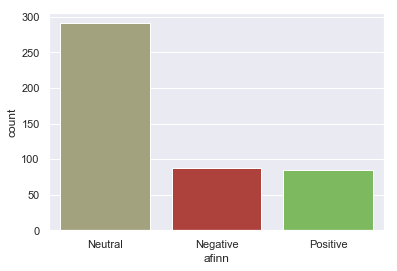

In [57]:
#show class imbalance using seaborn's countplot - Julio
import seaborn as sns
print('Julio Jones Sentiment Class Balance')
sns.set(style="darkgrid")
ax = sns.countplot(x="afinn", order=['Neutral','Negative','Positive'], data=fantasy_tweets_p1, palette=colors)

Will Fuller Sentiment Class Balance


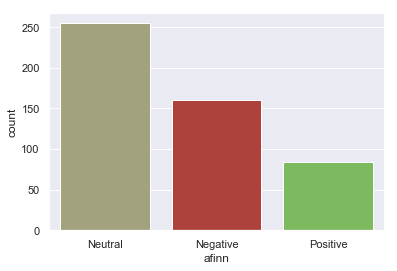

In [58]:
#show class imbalance using seaborn's countplot - Fuller
import seaborn as sns
print('Will Fuller Sentiment Class Balance')
sns.set(style="darkgrid")
ax = sns.countplot(x="afinn", order=['Neutral','Negative','Positive'],data=fantasy_tweets_p2, palette=colors)

In [59]:
#create an object storing the default nltk stopwords
nltk_stopwords = stopwords.words("english") 

#create a custom stop words list for player datasets
my_stopwords_1 = nltk_stopwords + ["rt", "https", "co", "fantasyfootball", "nfl", 
                                 "week", "amp","episode","points","fantasy","football","team"
                                "game","league","leagues","win","lose","won","lost","season","espn",
                                 "article","2019","via"]

In [65]:
#counting top 20 tokens for player - Julio
from sklearn.feature_extraction.text import CountVectorizer

cv_def_p1 = CountVectorizer(lowercase=True, binary=False, stop_words = my_stopwords_1) 
cv_eda_p1 = cv_def_p1.fit_transform(fantasy_tweets_p1['clean_tweet'])
print(cv_eda_p1.shape)
print('')
names_eda_p1 = cv_def_p1.get_feature_names()   #create list of feature names
count_eda_p1 = np.sum(cv_eda_p1.toarray(), axis = 0) # add up feature counts 
count2_eda_p1 = count_eda_p1.tolist()  # convert numpy array to list
count_eda_df_p1 = pd.DataFrame(count2_eda_p1, index = names_eda_p1, columns = ['count']) # create a dataframe from the list
print('Julio Jones Tweets - Token Count')
count_eda_df_p1.sort_values(['count'], ascending = False)[0:19]  #arrange by count instead of alphabetical (top 20)

(463, 1269)

Julio Jones Tweets - Token Count


,count
julio,367
jones,215
cooper,113
allen,104
keenan,103
wr,88
mike,87
kupp,87
godwin,84
chris,81


In [64]:
#counting top 20 tokens for player - Fuller
from sklearn.feature_extraction.text import CountVectorizer

cv_def_p2 = CountVectorizer(lowercase=True, binary=False, stop_words = my_stopwords_1) 
cv_eda_p2 = cv_def_p2.fit_transform(fantasy_tweets_p2['clean_tweet'])
print(cv_eda_p2.shape)
print('')
names_eda_p2 = cv_def_p2.get_feature_names()   #create list of feature names
count_eda_p2 = np.sum(cv_eda_p2.toarray(), axis = 0) # add up feature counts 
count2_eda_p2 = count_eda_p2.tolist()  # convert numpy array to list
count_eda_df_p2 = pd.DataFrame(count2_eda_p2, index = names_eda_p2, columns = ['count']) # create a dataframe from the list
print('Will Fuller Tweets - Token Count')
count_eda_df_p2.sort_values(['count'], ascending = False)[0:19]  #arrange by count instead of alphabetical (top 20)

(500, 984)

Will Fuller Tweets - Token Count


,count
fuller,390
wr,161
53,152
pts,129
scoring,127
since,123
balled,121
part,120
wk,120
2000,120


### 6. Summary

The sentiment analysis among the two trending players yielded some interesting results. 

Julio Jones has long been considered a top player for fantasy football, so it is interesting to note that today's sentiment is near even among the net positive and net negative tweets mentioning his name. A closer look at the token counts here shows a few other top players at his positiion, along with the token 'leaders'. It could be that there is debate going on regarding this weeks rankings for the top end wide receivers and an article on rankings this week may want to highlight Julio as a conversation piece.

Will Fuller has different results indicating nearly twice as many net negative tweets as positive. This is in contrast with the token counts revealing such positive words as 'balled', 'best', and in certain context, 'craziest'. The difference here could be a case of a player having an outlier performance the week prior, which if we look at the player analytics on our site, is exactly what happened. A player focused article discussing last week's performance, and what to expect going forward for this player based on our site's rest of season outlook, might attract some attention this week.